In [53]:
#importing the neccesary libraries
!pip install fuzzywuzzy
import numpy as np
import pandas as pd
from scipy.stats import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from fuzzywuzzy import process

%matplotlib inline

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [54]:
#importing the datasets
Data_path = pd.read_csv("/content/datasets/Training.csv")
data = Data_path.dropna(axis = 1 )

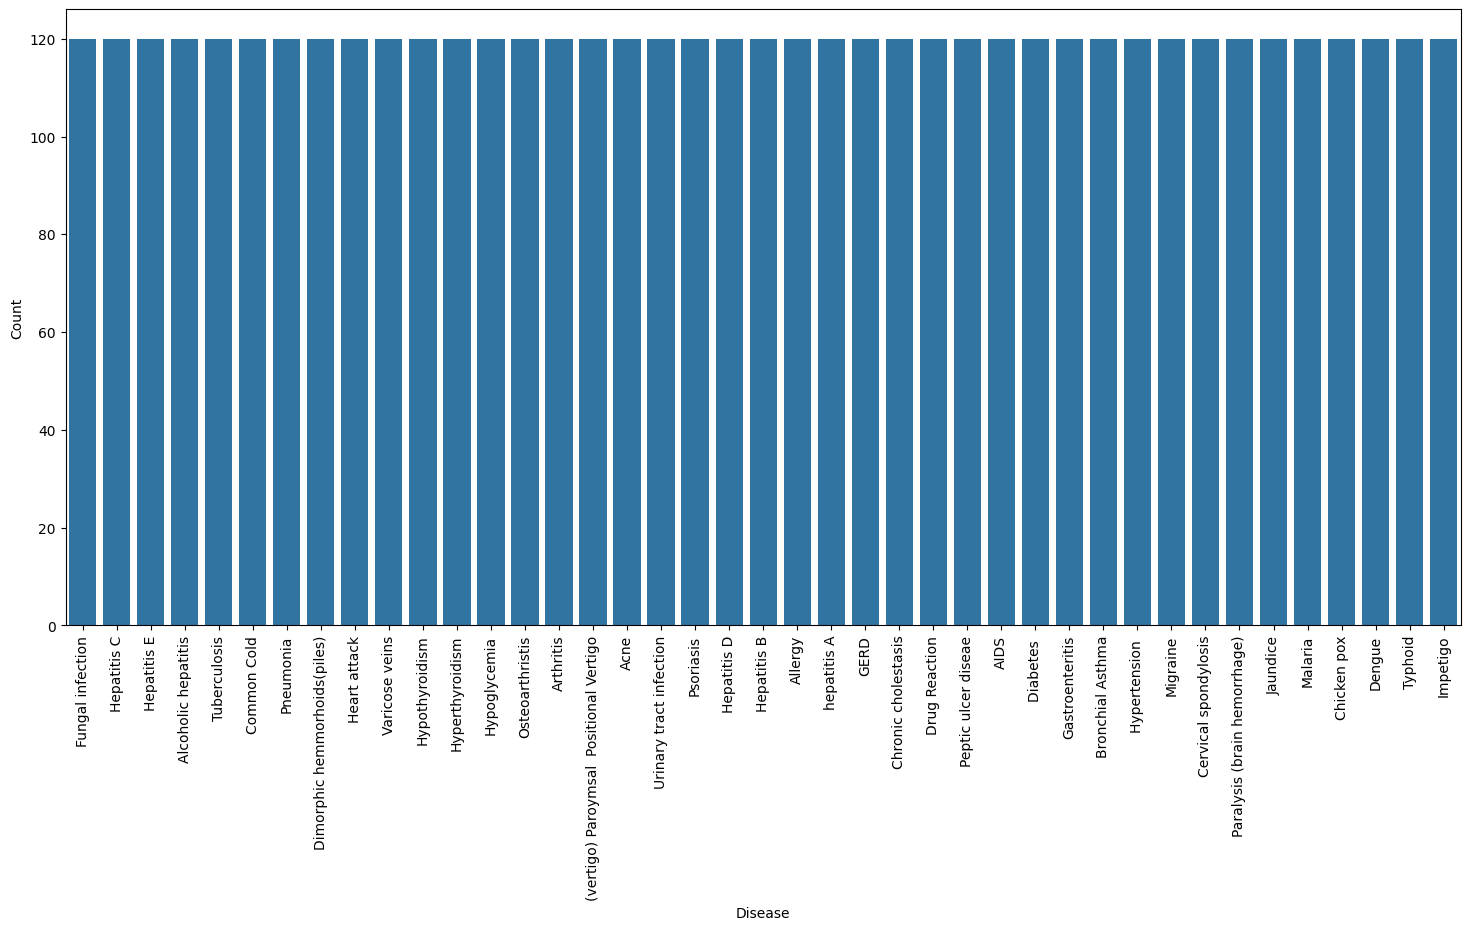

In [55]:
#checking whether the datasets is balanced
disease_counts = data['prognosis'].value_counts()
temp_df = pd.DataFrame({'Disease' : disease_counts.index, 'Count' : disease_counts.values})

plt.figure(figsize = (18, 8))
sns.barplot(x = 'Disease', y = 'Count', data = temp_df)
plt.xticks(rotation = 90)
plt.show()

In [56]:
#Encoding the target which is the prognosis into numerical
encoder = LabelEncoder()
data['prognosis'] = encoder.fit_transform(data['prognosis'])

<ipython-input-56-5ba2267982c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['prognosis'] = encoder.fit_transform(data['prognosis'])


In [57]:
data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,2
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,38
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,35


In [58]:
#split the data
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


In [59]:
#Building the model
#define the scoring metrics
from sklearn.model_selection import cross_val_score
def cv_scoring(estimator, X, y):
  return accuracy_score(y , estimator.predict(X))

#initialize the model
models = {
    "SVC": SVC(),
    "GaussianNB": GaussianNB(),
    "Random forest" :RandomForestClassifier( random_state = 18)
}

#producing cross_validation
for model_name in models:
  model = models[model_name]
  scores = cross_val_score(model, X, y, cv=10,
                           n_jobs= -1,
                           scoring = cv_scoring)
  print("==" * 30)
  print(model_name)
  print(f"Scores: {scores}")
  print(f"Mean: {np.mean(scores)}")
  print(f"Std: {np.std(scores)}")


SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean: 1.0
Std: 0.0
GaussianNB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean: 1.0
Std: 0.0
Random forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean: 1.0
Std: 0.0


Accuracy on train data by svm classifier: 100.0
Accuracy on test data by svm classifier: 100.0
Accuracy on test data by SVM Classifier: 100.0


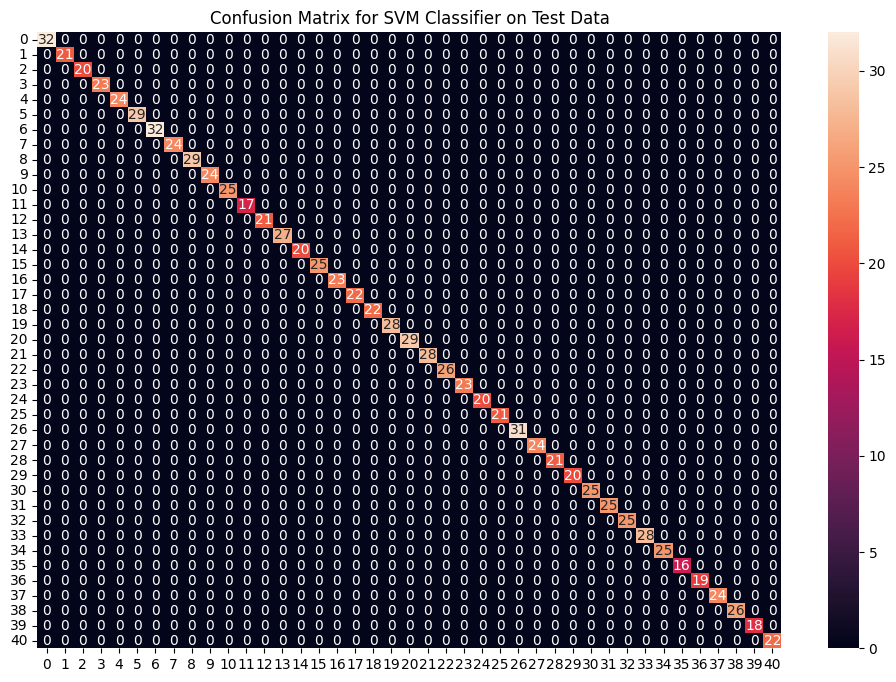

In [60]:
#training and fitting SVM classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on train data by svm classifier: {accuracy_score(y_train, svm_model.predict(X_train)) *100}")
print(f"Accuracy on test data by svm classifier: {accuracy_score(y_test, preds) *100 }")

print(f"Accuracy on test data by SVM Classifier: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

1.0
Accuracy on test data by Naive Bayes Classifier: 100.0


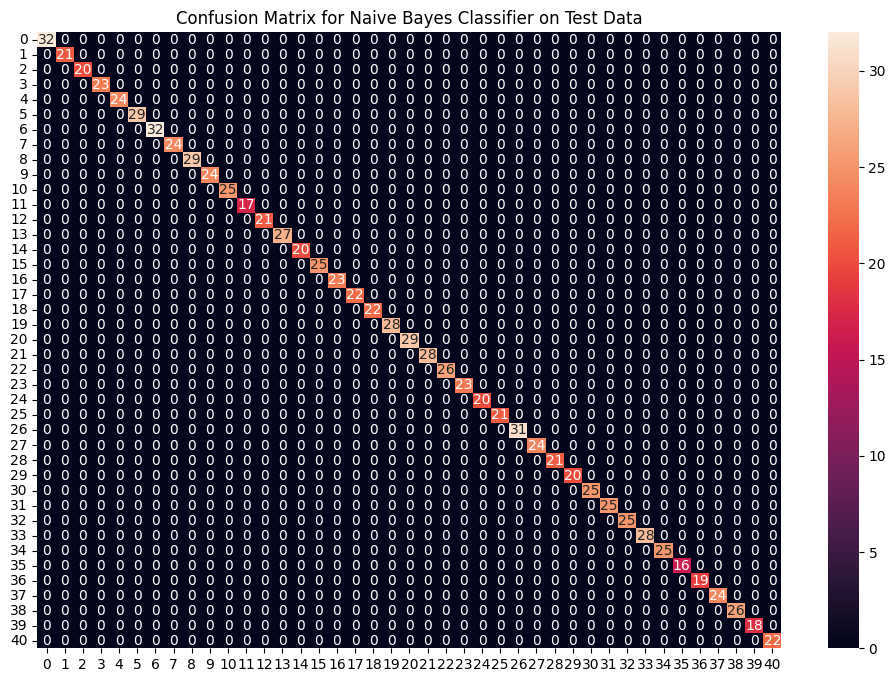

In [61]:
#training the Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)
val_pred = nb.predict(X_test)

acs = accuracy_score(y_test, val_pred )
print(acs)
print(f"Accuracy on test data by Naive Bayes Classifier: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

The accuracy score of random forest classifier is 1.0


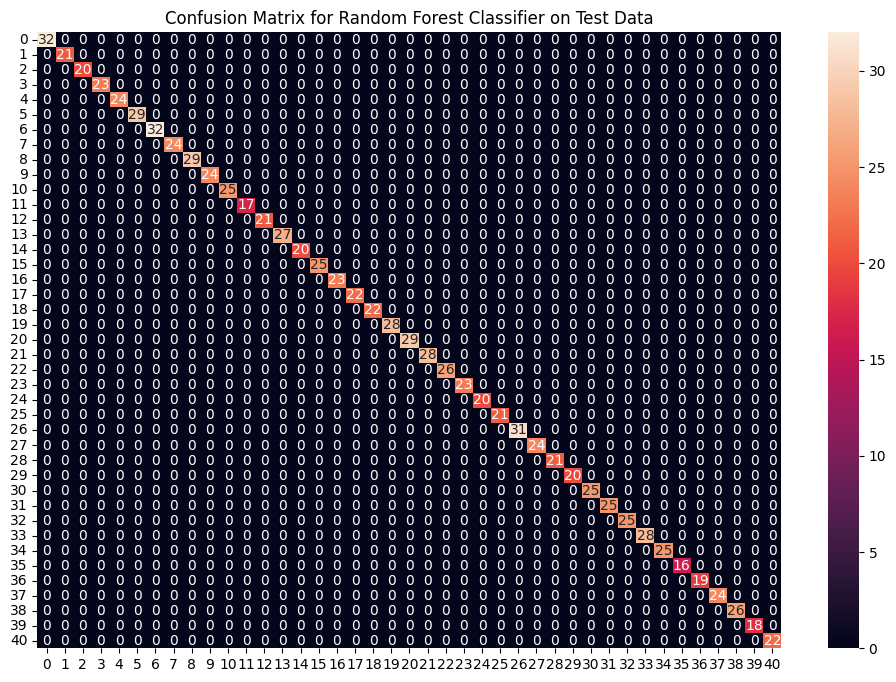

In [62]:
#Training The random Forest
rf= RandomForestClassifier( random_state = 18)
rf.fit(X_train, y_train)
val_pred2 = rf.predict(X_test)
rf_acs = accuracy_score(y_test, val_pred2)
print(f"The accuracy score of random forest classifier is {rf_acs}")
cf_matrix = confusion_matrix(y_test, val_pred2)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

Accuracy score on test data by the combined model: 100.0


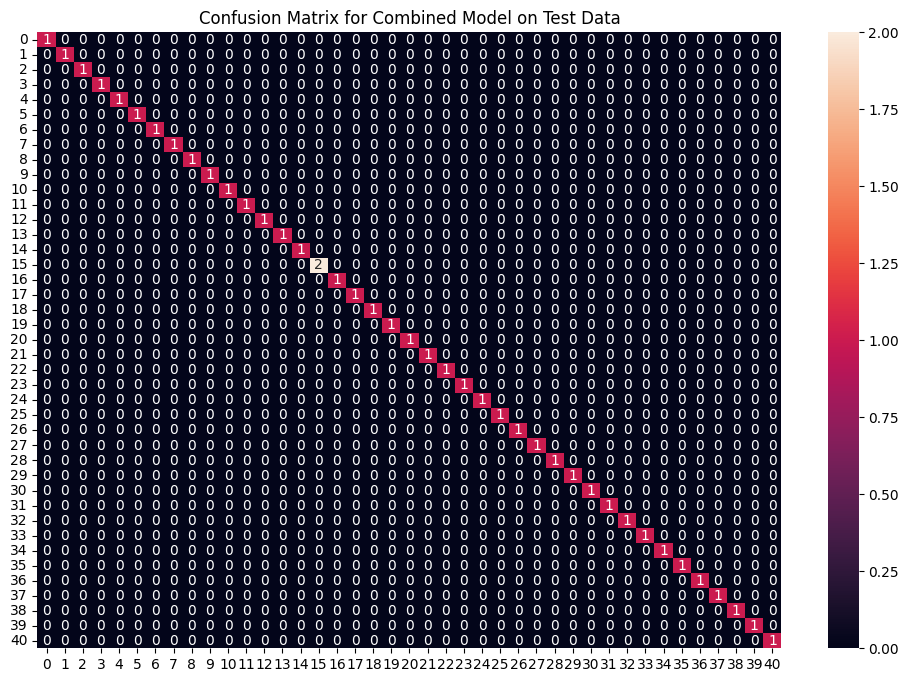

In [63]:
!pip install statistics
from statistics import mode
# Training the models on whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier( random_state = 18)

final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

test_data = pd.read_csv("/content/datasets/Testing.csv")

test_X = test_data.iloc[:, :-1]
test_y = encoder.transform(test_data.iloc[:, -1])

#making prediction on the test data
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

final_preds = [mode([i, j, k]) for i ,j ,k in zip(svm_preds, nb_preds, rf_preds)]
final_preds = [int(x) for x in final_preds]


print(f"Accuracy score on test data by the combined model: {accuracy_score(test_y, final_preds)*100}")

cf_matrix = confusion_matrix(test_y, final_preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Combined Model on Test Data")
plt.show()



In [64]:
X.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
       'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
       'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
      dtype='object', length=132)

In [68]:
symptoms = X.columns.values

symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index



data_dict = {
    "symptom_index": symptom_index,
    "predictions_classes": encoder.classes_
}


# Function to find the best match for a symptom
def get_best_match(symptom, symptom_index):
    best_match, score = process.extractOne(symptom, symptom_index.keys())
    return best_match if score > 75 else None  # You can adjust the threshold as needed


# Function to predict disease based on symptoms
# Defining the Function
# Input: string containing symptoms separated by commas
# Output: Generated predictions by models
def predictDisease(symptoms):
    symptoms = symptoms.split(",")
    symptoms = [symptom.strip() for symptom in symptoms]  # Remove leading/trailing whitespace


    # Find best matches for all symptoms
    matched_symptoms = {}
    for symptom in symptoms:
        best_match = get_best_match(symptom, data_dict["symptom_index"])
        if best_match:
            matched_symptoms[symptom] = best_match
        else:
            return f"Symptom '{symptom}' does not exist and no close match was found."

    # Creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for original_symptom, matched_symptom in matched_symptoms.items():
        index = data_dict["symptom_index"][matched_symptom]
        input_data[index] = 1



    # Reshaping the input data and converting it into suitable format for model predictions
    input_data = np.array(input_data).reshape(1, -1)

    # Generating individual outputs
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]

    # Making final prediction by taking mode of all predictions
    final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])[0][0]
    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction": final_prediction
    }
    return predictions

# Testing the function
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))


{'rf_model_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'F'}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [70]:
symptoms_input = input("Enter symptoms separated by commas: ")
print(predictDisease(symptoms_input))

Enter symptoms separated by commas: acidity, inflammatory_nails, continuous_sneezing
{'rf_model_prediction': 'Allergy', 'naive_bayes_prediction': 'Allergy', 'svm_model_prediction': 'Allergy', 'final_prediction': 'A'}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
